In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
dataset = pd.read_csv('D:\python practice\hfexcel.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Checking for null and missing values

In [2]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

AGE DISTRIBUTION 

In [17]:
hist_data =[dataset["age"].values]
group_labels = ['age'] 
fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()




THIS FIGURE SHOWS HIGHER RATE OF HEARTFAILURE LIES BETWEEN AGE OF 40 TO 80.


In [28]:
fig = px.box(dataset, x='sex', y='age', points='all', notched=True )
fig.update_layout( title_text="Gender wise Age Spread: Male = 1 Female =0")
fig.show()

Distribution of Male and female having the heartfailure disease, male between 50 to 70 are the most occured with disease and female between 50 to 65 have the same.

In [34]:
fig = px.box(dataset, y="age", x="sex", color="DEATH_EVENT", hover_data= dataset.columns, points="all")

fig.update_layout(title_text="Analysis of survival status based on Age and Gender Male=1 Female=0")
fig.show()

Survival rate is high between 40 to 70. Male have a higher survival rate in 50 to 60 while female has in 60 to 70.

In [36]:
fig = px.box(dataset, y="age", x="diabetes", color="DEATH_EVENT", hover_data= dataset.columns, points="all")

fig.update_layout(title_text="Analysis of survival status based on Age and Diabetes Male=1 Female=0")
fig.show()

In [38]:
fig = px.box(dataset, y="age", x="smoking", color="DEATH_EVENT", hover_data= dataset.columns, points="all")

fig.update_layout(title_text="Analysis of survival status based on Age and Smoking Male=1 Female=0")
fig.show()

Analysis of Survival Status based on Serum Sodium.

In [46]:
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="box",hover_data=dataset.columns,
                   title ="Analysis of Survival Status based on Serum Sodium", 
                   labels={"serum_sodium": "SERUM SODIUM"})
fig.show()

Majority of death took place in the count range from 125 to 142.

Analysis of Survival Status based on Serum Creatinine

In [47]:
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="box",hover_data=dataset.columns,
                   title ="Analysis of Survival Status based on Serum Creatinine", 
                   labels={"serum_creatinine": "SERUM Creatinine"})
fig.show()

Majority of death took place in the range from 0.75 mg/dL to 2.25mg/dL

Analysis of Survival Status based on Ejection Fraction 

In [166]:
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="box",hover_data=dataset.columns,
                   title ="Analysis of Survival Status based on Ejection Fraction ", 
                   labels={"ejection_fraction": "Ejection Fraction "})
fig.show()

Majority of death took place in the middle of 20% to 40% of ejection fraction

Analysis of Survival Status based on Creatinine Phosphokinase

In [167]:
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="box",hover_data=dataset.columns,
                   title ="Analysis of Survival Status based on Creatinine Phosphokinase ", 
                   labels={"creatinine_phosphokinase": "Creatinine Phosphokinase "})
fig.show()

Majority death took place at the range of 0-600 of creatinine phosphokinase.

Heat Map for the dataset

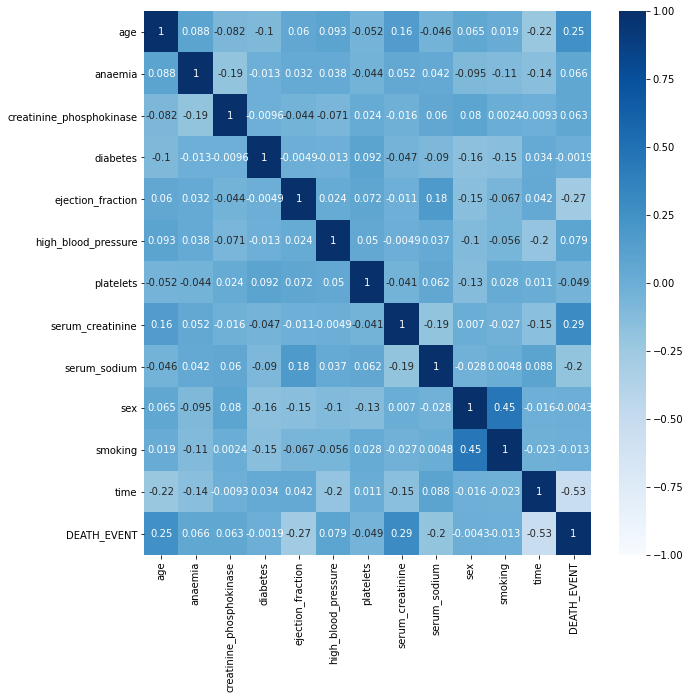

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), vmin=-1, cmap='Blues', annot=True);


Test - Train Split

In [154]:
Features = ['time','ejection_fraction','serum_creatinine']
x = dataset[Features]
y = dataset["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)
acc_list = []

Logistic Regression 

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8158995815899581
Accuracy for test set for Logistic Regression = 0.9


<Figure size 432x288 with 0 Axes>

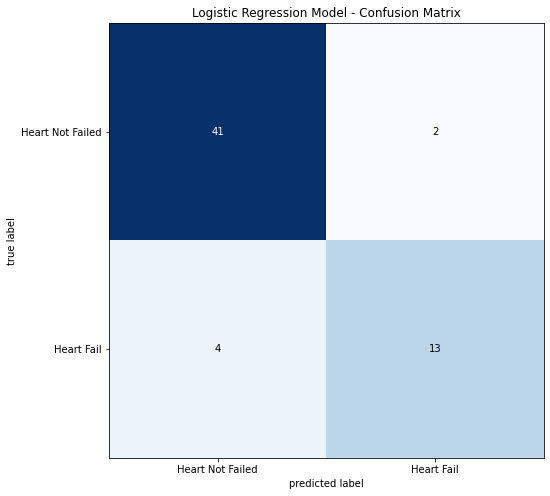

In [157]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()


Support Vector Classifier 

In [158]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))




Accuracy for training set for svm = 0.8326359832635983
Accuracy for test set for svm = 0.9


<Figure size 432x288 with 0 Axes>

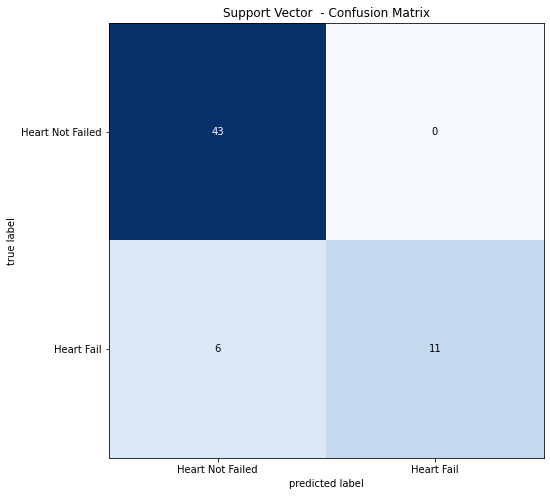

In [159]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Support Vector  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()


Decission Tree

In [160]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.8833333333333333


<Figure size 432x288 with 0 Axes>

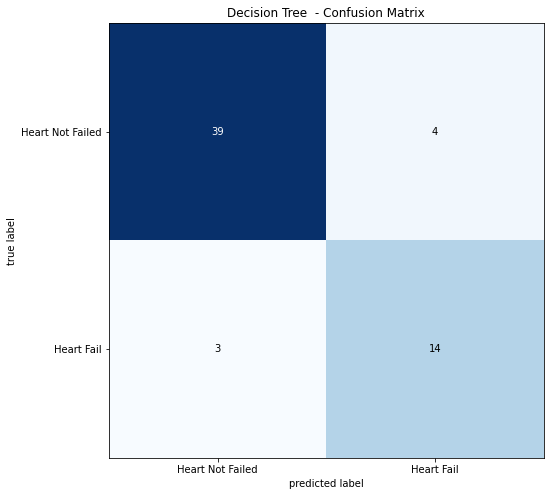

In [161]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()


Random Forest 

In [162]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(x_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Random Forest = 0.9790794979079498
Accuracy for test set for Random Forest = 0.9


<Figure size 432x288 with 0 Axes>

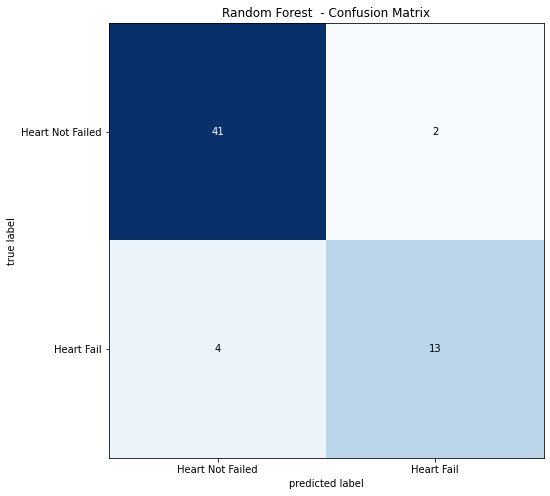

In [163]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"])
plt.show()
